Linear Regression -
Simple Linear Regression
Multiple Linear Regression

In [3]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
 # Reading the file

df = pd.read_csv('50_Startups.csv')
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


##### Project: Predicting Profit  

##### 🎯 Main Goal  
- Predict the **Profit** based on available data.  

---

##### 📊 Exploratory Data Analysis (EDA)  

##### 1. Check for Null Values  
- Use: `df.isnull().sum()`  
- Identify missing values in each column.  

##### 2. Summary Statistics  
- Use: `df.describe()`  
- Get mean, median, min, max, standard deviation, etc.  

##### 3. Basic Insights  
- Note distribution of features.  
- Detect outliers (boxplots/histograms).  
- Look for correlations (heatmap).  

---

##### 🤖 Model Building  

1. **Define Target Variable**: `Profit`  
2. **Split Data**: Train/Test (e.g., 80/20).  
3. **Choose Models**:  
   - Linear Regression  
   - Random Forest Regressor  
   - XGBoost (optional)  
4. **Train & Evaluate**:  
   - Metrics: R², RMSE, MAE  
   - Compare performance across models.  

---

##### ✅ Next Steps  
- Tune hyperparameters for best model.  
- Visualize predictions vs actuals.  
- Save and deploy the model (if needed).  


In [9]:
# Divide the data into dependents and independents

X = df.drop('Profit',axis=1).values # or df.iloc[:,:-1].values
y =df['Profit'].values # df.iloc[:,-1].values

In [10]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [11]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

[94657.16, 145077.58, 282574.31, 'New York'],
cant feed directly to ML model

problems - categorical data
solution - feature encoding

then feature scaling - mandatory step


In [ ]:
# Feature Encoding - Onehot Encoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(X)

#can delete one col for dummy encoding

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [13]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [14]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)




In [15]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

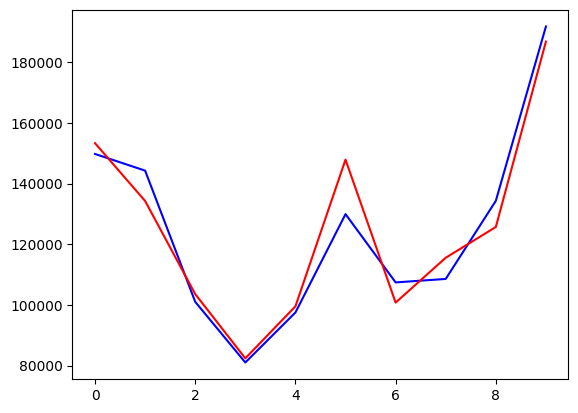

In [17]:
# Doing Predictions

y_pred = regressor.predict(X_test)

# Plotting of y_test vs y_pred

plt.plot(y_test , color ='blue', label ='test')
plt.plot(y_pred , color ='red', label ='train')

plt.show()

### Out of Box Predictions

In [19]:
data = [[0.0,0.0,1.0,160000,130000,350000]]

new_df = pd.DataFrame(data)
new_df = sc.transform(new_df)

In [20]:
single = regressor.predict(new_df)
print(single)

[186592.37928828]
